In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data= pd.read_csv("AQI_India.csv")

data

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Bihar,Katihar,"Mirchaibari, Katihar - BSPCB",04-11-2025 11:00:00,25.560083,87.553265,PM2.5,27.0,100.0,62.0
1,India,Bihar,Katihar,"Mirchaibari, Katihar - BSPCB",04-11-2025 11:00:00,25.560083,87.553265,PM10,25.0,94.0,58.0
2,India,Bihar,Manguraha,"Forest Rest House, Manguraha - BSPCB",04-11-2025 11:00:00,27.308328,84.531742,PM10,103.0,193.0,124.0
3,India,Bihar,Manguraha,"Forest Rest House, Manguraha - BSPCB",04-11-2025 11:00:00,27.308328,84.531742,SO2,16.0,18.0,17.0
4,India,Bihar,Motihari,"Gandak Colony, Motihari - BSPCB",04-11-2025 11:00:00,26.630860,84.900510,PM2.5,20.0,24.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...
3352,India,West_Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",04-11-2025 11:00:00,22.627847,88.380669,CO,28.0,44.0,36.0
3353,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",04-11-2025 11:00:00,22.544808,88.340369,PM10,83.0,185.0,138.0
3354,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",04-11-2025 11:00:00,22.544808,88.340369,SO2,2.0,12.0,6.0
3355,India,West_Bengal,Siliguri,"Ward-32 Bapupara, Siliguri - WBPCB",04-11-2025 11:00:00,26.687923,88.415250,PM2.5,34.0,57.0,42.0


In [4]:
data.shape

(3357, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3357 entries, 0 to 3356
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3357 non-null   object 
 1   state          3357 non-null   object 
 2   city           3357 non-null   object 
 3   station        3357 non-null   object 
 4   last_update    3357 non-null   object 
 5   latitude       3357 non-null   float64
 6   longitude      3357 non-null   float64
 7   pollutant_id   3357 non-null   object 
 8   pollutant_min  3179 non-null   float64
 9   pollutant_max  3179 non-null   float64
 10  pollutant_avg  3179 non-null   float64
dtypes: float64(5), object(6)
memory usage: 288.6+ KB


In [6]:
data.isnull().sum()

country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    178
pollutant_max    178
pollutant_avg    178
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.describe()

,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg
count,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000
mean,22.753183,78.490356,27.713117,80.952815,47.731991
std,5.550923,4.671140,42.883557,100.729115,66.496799
min,8.514909,70.909168,1.000000,1.000000,1.000000
25%,19.065931,75.638133,5.000000,16.000000,10.000000
50%,23.508764,77.315741,14.000000,44.000000,24.000000
75%,27.272719,80.260625,31.000000,102.500000,55.000000
max,31.620000,94.636574,500.000000,500.000000,500.000000


In [9]:
data=data[data['pollutant_min']<400]

In [10]:
data.duplicated().sum()

np.int64(0)

In [18]:
data['state'].value_counts()

state
Maharashtra          536
Uttar_Pradesh        350
Rajasthan            321
Delhi                247
Bihar                216
Karnataka            190
Haryana              189
TamilNadu            185
Madhya Pradesh       153
West_Bengal          145
Odisha               104
Gujarat               96
Chhattisgarh          85
Telangana             78
Andhra_Pradesh        69
Punjab                49
Assam                 43
Kerala                34
Chandigarh            21
Uttarakhand           20
Nagaland               7
Himachal Pradesh       7
Puducherry             7
Jharkhand              6
Sikkim                 6
Tripura                5
Arunachal_Pradesh      5
Meghalaya              4
Name: count, dtype: int64

In [19]:
data['pollutant_id'].value_counts()

pollutant_id
NO2      470
OZONE    467
CO       464
PM10     460
PM2.5    457
SO2      450
NH3      410
Name: count, dtype: int64

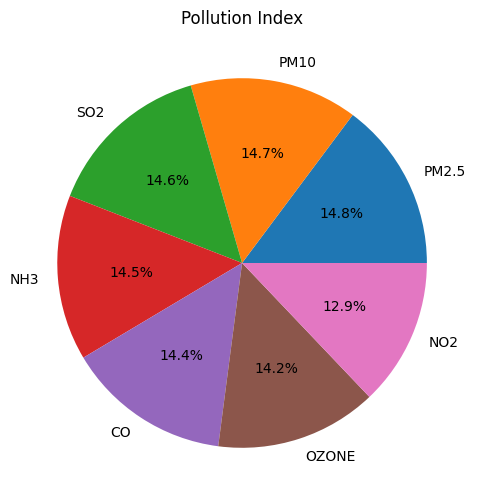

In [22]:
plt.figure(figsize=(10,6))
plt.pie(data['pollutant_id'].value_counts(),labels=data['pollutant_id'].unique(),autopct="%1.1f%%")
plt.title("Pollution Index")
plt.show()